In [1]:
## Download and preprocess TF motifs from databases
## JASPAR 2024
## Filter PWMs from different experiments
## see 'runall' script in each databases/*/ folder for pre-preproccing steps.

## After pre-processing all of the invdividual databases run
##      bin/runall.tomtom.v2.0beta-human
## to compute the pair-wise similarity for all the motifs.
## Results are stored in 'results/tomtom'.


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import CIS-BP metadata
cisbp = pd.read_table('databases/cisbp_v2.0/TF_Information.txt')
cisbp_is_direct = cisbp['TF_Status']=='D' # motifs which the motif model is a direct measurment; i.e., not inferred

# These are the motifs that exist in the MEME file
cisbp_motifs = !grep "MOTIF" databases/cisbp_v2.0/all.motifs.meme | cut -d" " -f2

cisbp_df = cisbp[cisbp_is_direct][['Motif_ID', 'DBID.1', 'TF_Name', 'Family_Name', 'Motif_Type', 'PMID']]
cisbp_df.drop_duplicates(inplace=True)

col_dict = {
    'Motif_ID': 'motif_id',
    'DBID.1': 'source_id',
    'TF_Name': 'tf_name',
    'Family_Name': 'family_name',
    'Motif_Type': 'motif_type'
}
cisbp_df = cisbp_df.rename(columns=col_dict).set_index('motif_id')

cisbp_df = cisbp_df.loc[cisbp_motifs]

In [4]:
cisbp_df

,source_id,tf_name,family_name,motif_type,PMID
motif_id,,,,,
M00217_2.00,ZNF200_H322Y,ZNF200,C2H2 ZF,PBM,27013732
M00218_2.00,ZNF200_REF,ZNF200,C2H2 ZF,PBM,27013732
M00219_2.00,ZNF200_S265Y,ZNF200,C2H2 ZF,PBM,27013732
M00220_2.00,SNAI2_D119E,SNAI2,C2H2 ZF,PBM,27013732
M00221_2.00,SNAI2_REF,SNAI2,C2H2 ZF,PBM,27013732
...,...,...,...,...,...
M11390_2.00,V$TBP_01,TBP,TBP,Transfac,16381825
M11433_2.00,V$SPZ1_01,SPZ1,Unknown,Transfac,16381825
M11435_2.00,V$FAC1_01,BPTF,Unknown,Transfac,16381825


In [7]:
# Import JASPAR2024 metadata

# These are the human only motifs; used the JASPAR search tool on website and downloaded all motifs from cart
jaspar2024 = !grep "MOTIF" databases/jaspar2024/JASPAR2024_CORE_vertebrates_mus_musculus_non-redundant_pfms_meme.meme | cut -d" " -f2

# Only get JASPAR motifs not in CIS-BP
# Note: some Taipale motifs are present in the JASPAR that might also be in CIS-BP

#jaspar_motifs = list(set(jaspar2024) - set(cisbp_df['source_id']))
jaspar_motifs = list(set(jaspar2024))
print(jaspar_motifs[:10])
from pyjaspar import jaspardb
jdb_obj = jaspardb(release='JASPAR2024')

motif_id = []
dbid = []
tf_name = []
tf_family_name = []
pmid = []
motif_type = []

for m in jaspar_motifs:
    motif = jdb_obj.fetch_motif_by_id(m)
    
    motif_id.append(m)
    dbid.append(m)
    
    tf_name.append(motif.name)
    tf_family_name.append(motif.tf_class)
    pmid.append(motif.medline)
    motif_type.append('Unknown')
    
jaspar2024_df = pd.DataFrame(
    {
        'motif_id': motif_id,
        'source_id': dbid,
        'tf_name': tf_name,
        'family_name': tf_family_name,
        'motif_type': motif_type,
        'PMID': pmid
    }
).set_index('motif_id')



['MA0144.1', 'MA0885.1', 'MA0739.1', 'MA0160.1', 'MA0079.2', 'MA0728.1', 'MA0611.1', 'MA0913.1', 'MA0099.1', 'MA2126.1']


In [8]:
jaspar2024_df

,source_id,tf_name,family_name,motif_type,PMID
motif_id,,,,,
MA0144.1,MA0144.1,Stat3,[STAT domain factors],Unknown,18555785
MA0885.1,MA0885.1,Dlx2,[Homeo domain factors],Unknown,18585359
MA0739.1,MA0739.1,Hic1,[C2H2 zinc finger factors],Unknown,15231840
MA0160.1,MA0160.1,NR4A2,[Nuclear receptors with C4 zinc fingers],Unknown,17916232
MA0079.2,MA0079.2,SP1,[C2H2 zinc finger factors],Unknown,17916232
...,...,...,...,...,...
MA2338.1,MA2338.1,Ppara,[Nuclear receptors with C4 zinc fingers],Unknown,31175293
MA0633.1,MA0633.1,Twist2,[Basic helix-loop-helix factors (bHLH)],Unknown,10594029
MA0879.1,MA0879.1,Dlx1,[Homeo domain factors],Unknown,18585359


In [9]:
# Get BANP motif from Grand et al. 2021

grand2021 = !grep "MOTIF" databases/Grand2021/BANP.meme | cut -d" " -f2

motif_id = []
dbid = []
tf_name = []
tf_family_name = []
pmid = []
motif_type = []

for m in grand2021:    
    motif_id.append(m)
    dbid.append('BANP')
    
    tf_name.append('BANP')
    tf_family_name.append('Unknown')
    pmid.append(34234345)
    motif_type.append('ChIP-seq')
    
grand2021_df = pd.DataFrame(
    {
        'motif_id': motif_id,
        'source_id': dbid,
        'tf_name': tf_name,
        'family_name': tf_family_name,
        'motif_type': motif_type,
        'PMID': pmid
    }
).set_index('motif_id')


In [11]:
#Combine motif metadata.

#motifs = cisbp_df.index.tolist()
#print(len(motifs))
#motifs += jaspar_motifs
#print(len(motifs))
#motifs += grand2021 
#print(len(motifs))

#df_motif_info = pd.concat([cisbp_df, jaspar2024_df, grand2021_df])
#df_motif_info['motif_type'].value_counts()


4351
4575
4576


motif_type
SELEX                2578
ChIP-seq              531
Misc                  484
PBM                   252
Transfac              225
Unknown               225
ChIP-seq+ChIP-exo     221
SMiLE-seq              52
COMPILED                4
ChIP-exo                3
B1H                     1
Name: count, dtype: int64

In [16]:
# Here we only use jaspar mus musculus dataset
motifs = jaspar_motifs
df_motif_info = jaspar2024_df
df_motif_info['motif_type'].value_counts()

motif_type
Unknown    224
Name: count, dtype: int64

In [18]:
df_motif_info.loc['MA0144.1']

source_id                   MA0144.1
tf_name                        Stat3
family_name    [STAT domain factors]
motif_type                   Unknown
PMID                        18555785
Name: MA0144.1, dtype: object

In [39]:
import os

# Update the PATH environment variable so the notebook session recognizes 'tomtom'
os.environ['PATH'] = '/pmglocal/ty2514/meme/bin:/pmglocal/ty2514/meme/libexec/meme-5.5.5:' + os.environ['PATH']

# Verify that 'tomtom' is now in the PATH
!which tomtom

# Create the output directory if it doesn't exist
os.makedirs('/pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/tomtom', exist_ok=True)

# Run the tomtom command
!tomtom /pmglocal/ty2514/Enhancer/motif-clustering/databases/jaspar2024/JASPAR2024_CORE_vertebrates_mus_musculus_non-redundant_pfms_meme.meme /pmglocal/ty2514/Enhancer/motif-clustering/databases/jaspar2024/JASPAR2024_CORE_vertebrates_mus_musculus_non-redundant_pfms_meme.meme -oc /pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/tomtom -dist kullback -motif-pseudo 0.1 -min-overlap 1

# Create pfm files
os.makedirs('/pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/pfms', exist_ok=True)

!python bin/meme2jaspar.py /pmglocal/ty2514/Enhancer/motif-clustering/databases/jaspar2024/JASPAR2024_CORE_vertebrates_mus_musculus_non-redundant_pfms_meme.meme /pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/pfms



/pmglocal/ty2514/meme/bin/tomtom


The output directory '/pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/tomtom' already exists.
Its contents will be overwritten.
Processing query 1 out of 224 
# Computing q-values.
#   Estimating pi_0 from all 448 observed p-values.
#   Estimating pi_0.
# Minimal pi_zero = 0.942211
#   Estimated pi_0=0.942211
Processing query 2 out of 224 
# Computing q-values.
#   Estimating pi_0 from all 448 observed p-values.
#   Estimating pi_0.
# Minimal pi_zero = 0.991565
#   Estimated pi_0=0.991565
Processing query 3 out of 224 
# Computing q-values.
#   Estimating pi_0 from all 448 observed p-values.
#   Estimating pi_0.
# Minimal pi_zero = 0.998295
#   Estimated pi_0=0.998295
Processing query 4 out of 224 
# Computing q-values.
#   Estimating pi_0 from all 448 observed p-values.
#   Estimating pi_0.
# Minimal pi_zero = 0.992567
#   Estimated pi_0=0.996052
Processing query 5 out of 224 
# Computing q-values.
#   Estimating pi_0 from all 448 observed p-va

In [40]:
# Load up the TOMTOM results
tomtom = pd.read_table('/pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/tomtom/tomtom.tsv').rename(columns={'Query_ID': 'Query ID','Target_ID': 'Target ID','Optimal_offset':'Optimal offset','Target_consensus':'Target consensus', 'Query_consensus': 'Query consensus'})
tomtom = tomtom.iloc[:-3,:] # Remove last three rows
sim = tomtom.pivot_table(index='Query ID', columns='Target ID', values='E-value', fill_value=np.nan)
cols = sim.columns.intersection(motifs)
rows = sim.index.intersection(motifs)

sim = sim[cols].loc[rows]

x = sim.values

w = np.triu(x) +  np.triu(x, 1).T
v = np.tril(x) + np.tril(x, -1).T

sim.iloc[:,:] = np.nanmin(np.dstack([w, v]), axis=2)

/tmp/ipykernel_3751320/4109148375.py:15: RuntimeWarning: All-NaN slice encountered
  sim.iloc[:,:] = np.nanmin(np.dstack([w, v]), axis=2)


In [41]:
sim.fillna(100, inplace=True)
sim = -np.log10(sim)
sim[np.isinf(sim)] = 10

/pmglocal/ty2514/miniforge3/envs/explainn/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [42]:
sim

Target ID,MA0002.2,MA0004.1,MA0006.1,MA0007.3,MA0009.1,MA0014.1,MA0018.2,MA0027.1,MA0029.1,MA0035.1,...,MA2095.1,MA2122.1,MA2123.1,MA2124.1,MA2125.1,MA2126.1,MA2337.1,MA2338.1,MA2339.1,MA2340.1
Query ID,,,,,,,,,,,,,,,,,,,,,
MA0002.2,17.108509,-2.000000,-2.000000,-2.000000,-2.000000,-2.0,-2.000000,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.000000,-2.0,-2.0,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000
MA0004.1,-2.000000,5.485079,-0.308050,-2.000000,-2.000000,-2.0,-2.000000,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.000000,-2.0,-2.0,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000
MA0006.1,-2.000000,-0.308050,6.965472,-2.000000,-2.000000,-2.0,-2.000000,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.000000,-2.0,-2.0,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000
MA0007.3,-2.000000,-2.000000,-2.000000,24.949972,-2.000000,-2.0,-2.000000,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.000000,-2.0,-2.0,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000
MA0009.1,-2.000000,-2.000000,-2.000000,-2.000000,16.974334,-2.0,-2.000000,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.000000,-2.0,-2.0,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MA2126.1,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.0,-2.000000,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.000000,-2.0,-2.0,10.78386,-2.000000,-2.000000,-2.000000,-2.000000
MA2337.1,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.0,-0.407274,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.000000,-2.0,-2.0,-2.00000,6.071199,1.941305,-2.000000,-2.000000
MA2338.1,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.0,-2.000000,-2.0,-2.0,-2.0,...,-2.0,-2.0,-0.508431,-2.0,-2.0,-2.00000,1.941305,7.009518,-2.000000,-2.000000


In [43]:
# Cluster the square matrix

from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

Z = linkage(sim, method = 'complete', metric = 'correlation')

cl = fcluster(Z, 0.7, criterion='distance')
o = dendrogram(Z, no_plot=True)['leaves']

print(f'Number of motif clusters: {max(cl)}')

motif_annot_df = pd.DataFrame({'motif_id':sim.index, 'cluster':cl}).merge(df_motif_info.reset_index(), on='motif_id', how='left').set_index('motif_id')
motif_annot_df['cluster'] = 'AC' + motif_annot_df['cluster'].astype(str).str.zfill(4)
motif_annot_df.head()

Number of motif clusters: 82


,cluster,source_id,tf_name,family_name,motif_type,PMID
motif_id,,,,,,
MA0002.2,AC0052,MA0002.2,Runx1,[Runt domain factors],Unknown,8413232
MA0004.1,AC0033,MA0004.1,Arnt,[Basic helix-loop-helix factors (bHLH)],Unknown,7592839
MA0006.1,AC0035,MA0006.1,Ahr::Arnt,"[Basic helix-loop-helix factors (bHLH), Basic ...",Unknown,7592839
MA0007.3,AC0040,MA0007.3,Ar,[Nuclear receptors with C4 zinc fingers],Unknown,20943813
MA0009.1,AC0031,MA0009.1,Tbxt,[T-Box factors],Unknown,8344258


In [44]:
#motif_annot_df.to_csv('results/JASPAR2024_cluster_anno.csv')
motif_annot_df[motif_annot_df['source_id'] == 'MA0002.2']

,cluster,source_id,tf_name,family_name,motif_type,PMID
motif_id,,,,,,
MA0002.2,AC0052,MA0002.2,Runx1,[Runt domain factors],Unknown,8413232


In [36]:
# Step 1: Convert lists in 'family_name' to strings
motif_annot_df['family_name'] = motif_annot_df['family_name'].apply(lambda x: '/'.join(x) if isinstance(x, list) else x)

# Step 2: Define a function to create the cluster_annotation
def annotate_cluster(group):
    unique_families = group['family_name'].unique()
    annotation = '/'.join(unique_families)
    group['cluster_annotation'] = annotation
    return group

# Step 3: Apply the function to each group
motif_annot_df = motif_annot_df.groupby('cluster').apply(annotate_cluster)

# Step 4: Reset the index if needed (depends on your original DataFrame structure)
motif_annot_df2 = motif_annot_df.reset_index(drop=True)
#motif_annot_df2.to_csv('results/JASPAR2024_cluster.csv')

/tmp/ipykernel_3751320/2817680292.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  motif_annot_df = motif_annot_df.groupby('cluster').apply(annotate_cluster)


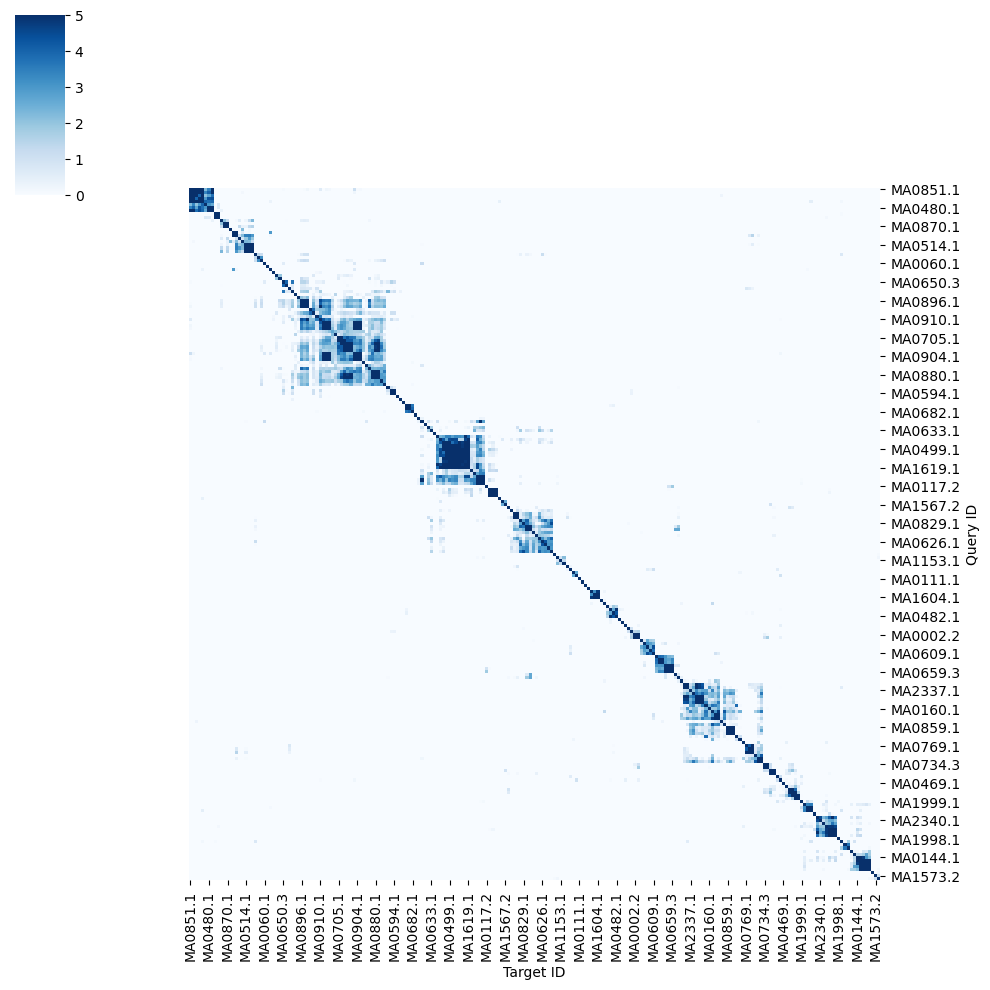

In [45]:
# Heatmap plot

import matplotlib.pyplot as plt
import seaborn as sns

sns.clustermap(sim.iloc[o,o], vmin=0, vmax=5, row_cluster=False, col_cluster=False, cmap='Blues')

plt.savefig('JASPAR2024_mus_musculus_non-redundant_results/heatmap.png')

In [59]:
def relative_info_content(pwm):
    p = pwm/np.sum(pwm, axis = 1)[:,np.newaxis]
    ic = 2+np.sum(p*np.nan_to_num(np.log2(p)), axis = 1)
    ric = p*ic[:,np.newaxis]
    return ric


def rev_compl(st):
    nn = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(nn[n] for n in reversed(st))

import warnings
warnings.filterwarnings('ignore')

def abs_mean(x):
    return np.mean(np.abs(x))

def process_cluster(df, tomtom_df):
    
    import os.path
    
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as mgridspec
    
    from genome_tools.plotting import sequence
    

    motifs = df.index

    rows = (tomtom_df['Query ID'].isin(motifs)) & (tomtom_df['Target ID'].isin(motifs))
    all_pairwise_df = tomtom_df[rows]        
    
    # Seed motif has the best optimal offset in the group
    
    seed_motif = all_pairwise_df.groupby('Query ID').agg({'Overlap': abs_mean}).sort_values('Overlap', ascending=False).index[0]
    seed_motif = all_pairwise_df.groupby('Query ID').agg({'E-value': np.median}).sort_values('E-value', ascending=True).index[0]

    
    rows = (tomtom_df['Query ID'] == seed_motif) & (tomtom_df['Target ID'].isin(motifs))
    pairwise_df = tomtom_df[rows] 
    
    pivot_df = all_pairwise_df.pivot_table(index='Query ID', columns='Target ID', values='Optimal offset')
    q = pivot_df.loc[seed_motif]
    qi = q[~np.isnan(q)].index
    
    
    query = []
    target = []
    offset = []
    orientation = []
    target_consensus = []
    query_consensus = []
    
    for m in motifs.difference(pairwise_df['Target ID']):
        t = pivot_df[m]
        ti = t[~np.isnan(t)].index
        
        try:
            common_motif = (qi&ti)[0]
        except:
            print(f'ERROR: {m} no alignments available!')
            continue
            
        row_q = (all_pairwise_df['Query ID'] == seed_motif) & (all_pairwise_df['Target ID'] == common_motif)
        row_t = (all_pairwise_df['Query ID'] == common_motif) & (all_pairwise_df['Target ID'] == m)
        
        #print(all_pairwise_df[row_t|row_q])
        
        offset_q = all_pairwise_df[row_q]['Optimal offset'].iloc[0]
        offset_t = all_pairwise_df[row_t]['Optimal offset'].iloc[0]
        
        orientation_q = all_pairwise_df[row_q]['Orientation'].iloc[0]
        orientation_t = all_pairwise_df[row_t]['Orientation'].iloc[0]
        
        consensus_q = all_pairwise_df[row_q]['Query consensus'].iloc[0]
        
        consensus_tq = all_pairwise_df[row_t]['Query consensus'].iloc[0]
        consensus_tt = all_pairwise_df[row_t]['Target consensus'].iloc[0]
        
        offset_p = len(consensus_tt) - offset_t - len(consensus_tq)
        
        target.append(m)
        query_consensus.append(consensus_q)

        if orientation_t == orientation_q:
            orientation.append('+')
            target_consensus.append(consensus_tt)
            
            if orientation_t == '+':
                offset.append(offset_q+offset_t)
            else:
                offset.append(offset_p+offset_q)
        else:            
            orientation.append('-')
            target_consensus.append(rev_compl(consensus_tt))
            
            if orientation_q == '-':        
                offset.append(offset_p+offset_q)
            else:
                offset.append(offset_q+offset_t)
        
    z = pd.DataFrame({
        'Query ID': seed_motif,
        'Target ID': target,
        'Optimal offset': offset,
        'p-value': 0, 
        'E-value': 0,
        'q-value': 1,
        'Overlap': 0,
        'Query consensus': query_consensus,
        'Target consensus': target_consensus,
        'Orientation': orientation,
    })
    
    
    if len(z) > 0:
        pairwise_df = pd.concat([pairwise_df, z])
        #print(z)
    
    #print(len(motifs), z.shape[0], pairwise_df.shape[0])
    
    w = pairwise_df['Target consensus'].str.len()
    left = min(-pairwise_df['Optimal offset'])
    l_offset = -left - pairwise_df['Optimal offset']
    right = max(l_offset + w)
    r_offset = right - w - l_offset
    
    alignment_df = pairwise_df.drop(['Query ID', 'Optimal offset', 'p-value', 'E-value', 'q-value', 'Overlap', 'Query consensus'], axis=1)
    alignment_df.loc[:,'w'] = w
    alignment_df.loc[:,'l_offset'] = l_offset
    alignment_df.loc[:,'r_offset'] = r_offset
    alignment_df.columns = ['motif', 'consensus', 'strand', 'w', 'l_offset', 'r_offset']
    
    alignment_df.reset_index(drop=True, inplace=True)

    alignment_df = alignment_df.merge(df.reset_index(), left_on='motif', right_on='motif_id')
    
    alignment_df.sort_values(by='tf_name', inplace=True)
    alignment_df.reset_index(inplace=True)
    
    n = len(alignment_df)
    l = min(alignment_df['l_offset'])
    r = max(alignment_df['r_offset'] + alignment_df['w'])
    w = r - l
  
    summed_pwm = np.zeros((4, int(w), int(n)))
    
    for i, row in alignment_df.iterrows():
        
        motif_id = row['motif']
        rc = row['strand'] == '-'
        left = int(row['l_offset'])
        width = int(row['w'])

        motif_pfm = os.path.join('/pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/pfms/', motif_id + '.pfm')
        pwm = np.loadtxt(motif_pfm)
    
        if rc:
            pwm = pwm[::-1,::-1]
        

        extended_pwm = np.ones((4, int(w))) * 0.25
        extended_pwm[:,left:left+width] = pwm
            
        summed_pwm[:,:,i] += extended_pwm
        
    avg_pwm = np.nanmean(summed_pwm, axis=2).T
 
    ic = relative_info_content(avg_pwm)
    total_ic = ic.sum(axis=1)

    cdf = np.cumsum(total_ic)/np.sum(total_ic)
    s = np.where(cdf > 0.05)[0][0]
    e = np.where(cdf > 0.95)[0][0] + 1    

    avg_pwm = avg_pwm[s:e,:]
    
    ## plot
    
    fig = plt.figure()
    fig.set_size_inches((w+2)*.125+2, (n+1)*0.5+1)
    
    gs = mgridspec.GridSpec(n+1, 1)
    
    for i, row in alignment_df.iterrows():
        ax = fig.add_subplot(gs[i+1, :])
        
        motif_id = row['motif']
        rc = row['strand'] == '-'
        left = row['l_offset']
        width = row['w']

        motif_pfm = os.path.join('/pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/pfms/', motif_id + '.pfm')
        pwm = np.loadtxt(motif_pfm)
    
        if rc:
            pwm = pwm[::-1,::-1]
        
        sequence.seq_plot(relative_info_content(pwm.T), ax=ax, offset=left)

        ax.axvspan(l-1, s, fc='lightgrey', alpha=0.5)
        ax.axvspan(e, r+1, fc='lightgrey', alpha=0.5)
        
        ax.set_xlim(left=l-1, right=r+1)
        ax.set_ylim(bottom=0, top=2.1)

        ax.xaxis.set_visible(False)
        ax.set_yticks([])
        
        source_id = str(row['source_id'])
        source_id = source_id[:10] + '...' if len(source_id) > 10 else source_id
        tf_name = str(row['tf_name'])  + '(' + str(row['motif_type']) + ')'

        ax.set_ylabel(tf_name + '\n (' + source_id + ')', rotation=0, ha='right', va='center', fontname="IBM Plex Mono", fontsize='medium')

    # Archetype motif
    ax = fig.add_subplot(gs[0,:])

    sequence.seq_plot(relative_info_content(avg_pwm), ax=ax, offset=s)

    ax.set_xlim(left=l-1, right=r+1)
    ax.set_ylim(bottom=0, top=2.1)
    ax.xaxis.set_visible(False)
    ax.set_yticks([])

    ax.axvspan(s, e, fc='none', ec='r', lw=2, clip_on=False)
    [ax.spines[loc].set_visible(False) for loc in ['top', 'bottom', 'left', 'right']]

    ax.set_ylabel('Archetype\nconsensus', rotation=0, ha='right', va='center', fontname="IBM Plex Mono", fontsize='large', fontweight='bold', color='r')
    
    cluster_id = str(alignment_df['cluster'][0])
    gene_family = alignment_df['tf_name'].str.replace('[\-0-9]+$', '').value_counts().index[:2].str.cat(sep='/')
    dbd = alignment_df['family_name'].astype(str).value_counts().index[0].replace(' ', '_')
    cluster_name = cluster_id + ':' + gene_family + ':' + dbd

    figw, figh = fig.get_size_inches()
    height_frac = (figh-0.75)/figh
    
   
    
    gs.update(left=1-((figw-1.75)/figw), right=(figw-0.25)/figw, top=(figh-0.75)/figh, bottom=1-((figh-0.25)/figh))
    
    fig.suptitle(cluster_name.upper(), fontname="IBM Plex Mono", fontweight='bold', fontsize='large', y=1-(.5/figh), va='center')
    os.makedirs('/pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/clusters', exist_ok=True)
    plt.savefig(f'JASPAR2024_mus_musculus_non-redundant_results/clusters/{cluster_id}.pdf')
    plt.savefig(f'JASPAR2024_mus_musculus_non-redundant_results/clusters/{cluster_id}.png')
    
    #
    w = avg_pwm.shape[0]
    
    fig = plt.figure()
    #fig.set_size_inches(w*0.125+0.5, 0.75)
    fig.set_size_inches(w*0.125, 0.5)
    
    figw, figh = fig.get_size_inches() 
    
    gs = mgridspec.GridSpec(1, 1)
    #gs.update(left=1-((figw-0.25)/figw), right=(figw-0.25)/figw, top=1-(0.25/figh), bottom=0)
    gs.update(left=0, right=1, top=1, bottom=0)

    ax = fig.add_subplot(gs[:,:])
    
    sequence.seq_plot(relative_info_content(avg_pwm), ax=ax)
    
    ax.set_xlim(left=0, right=w)
    ax.set_ylim(bottom=0, top=2.1)
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    [ax.spines[loc].set_visible(False) for loc in ['top', 'bottom', 'left', 'right']]
    os.makedirs('/pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/clusters/logos', exist_ok=True)
    plt.savefig(f'JASPAR2024_mus_musculus_non-redundant_results/clusters/logos/{cluster_id}.pdf')
    plt.savefig(f'JASPAR2024_mus_musculus_non-redundant_results/clusters/logos/{cluster_id}.png')
    
    header_line =  cluster_name + '\n'
    mat = pd.DataFrame(avg_pwm.T, index=['A:', 'C:', 'G:', 'T:']).to_string(header=False)
    return header_line + mat

In [60]:
cluster = 'AC0052'
# Ensure 'cluster' is not part of the index
#motif_annot_df.reset_index(inplace=True)
#a = motif_annot_df
df = motif_annot_df.groupby('cluster').get_group(cluster)

pwm = process_cluster(df, tomtom)

ERROR: MA0483.1 no alignments available!


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

In [61]:
plt.ioff()

import matplotlib.pyplot as plt

with open('JASPAR2024_mus_musculus_non-redundant_results/consensus_pwms.uniprobe', 'w') as fh:
    
    for cluster, df in motif_annot_df.groupby('cluster'):
        print(cluster)
        consensus_pwm = process_cluster(df, tomtom)
        fh.write(consensus_pwm + '\n\n')

AC0001


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0002


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0003


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0004


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0005


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0006


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0007


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0008


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0009


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0010


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0011
ERROR: MA0151.1 no alignments available!


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0012


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0013


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.


AC0014


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0015


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0016


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0017


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0018


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0019


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0020


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0021


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0022


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0023


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0024


findfont: Font family 'IBM Plex Mono' not found.


AC0025


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0026


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0027


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0028


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0029


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0030


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0031


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0032


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0033


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0034


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0035
AC0036
ERROR: MA1153.1 no alignments available!


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0037


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0038


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0039


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0040


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0041
AC0042


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0043


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0044


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0045


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0046


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0047


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0048


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0049


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0050


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0051


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0052
ERROR: MA0483.1 no alignments available!


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0053


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0054


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0055


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0056


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0057


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0058


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0059


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0060


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0061


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0062


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0063


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0064
ERROR: MA0114.3 no alignments available!


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0065


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0066


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0067


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0068


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0069


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0070


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0071


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0072


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0073


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0074


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0075


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0076


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0077


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0078


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0079


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0080


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0081
ERROR: MA2125.1 no alignments available!


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

AC0082


findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font family 'IBM Plex Mono' not found.
findfont: Font famil

In [26]:
# size = motif_annot_df.groupby('cluster').size()

terms = motif_annot_df.groupby('cluster').agg({'source_id': ' '.join, 'tf_name': ' '.join})
terms['n'] = motif_annot_df.groupby('cluster').size()
terms = terms[['n', 'source_id', 'tf_name']]

terms.sort_values(by='n', ascending=False).to_csv('JASPAR2024_mus_musculus_non-redundant_results/clusters.txt', sep='\t', header=None, index=True)

In [27]:
# Make the archetype motif MEME file

!uniprobe2meme results/consensus_pwms.uniprobe > results/consensus_pwms.meme

/bin/bash: line 1: uniprobe2meme: command not found


In [54]:
# Output final motif metadata table

motif_annot_df.to_csv('JASPAR2024_mus_musculus_non-redundant_results/metadata.tsv', header=True, index=True, sep='\t')

In [1]:
motif_annot_df.head()

NameError: name 'motif_annot_df' is not defined

In [482]:
# Make the HTML files
!bash bin/runall.make-html